In [5]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd 
from pandas.plotting import scatter_matrix

import seaborn as sns

import statsmodels.api as sm
import numpy as np
plt.style.use('bmh')
%matplotlib inline


from sklearn.linear_model import LinearRegression

In [6]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/testing_set_label.csv')
test_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490


In [7]:
test_data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,F,0.555,0.445,0.175,1.1465,0.5510,0.2440,0.2785
1,I,0.360,0.270,0.090,0.2190,0.0970,0.0405,0.0650
2,I,0.395,0.320,0.100,0.3075,0.1490,0.0535,0.0900
3,F,0.585,0.450,0.170,0.8685,0.3325,0.1635,0.2700
4,F,0.575,0.460,0.160,1.1030,0.5380,0.2210,0.2490
...,...,...,...,...,...,...,...,...
1039,I,0.270,0.190,0.080,0.0810,0.0265,0.0195,0.0300
1040,I,0.520,0.395,0.115,0.6445,0.3155,0.1245,0.1860
1041,I,0.480,0.355,0.110,0.4495,0.2010,0.0890,0.1400
1042,M,0.665,0.520,0.175,1.3725,0.6060,0.3200,0.3950


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

sex_label = LabelEncoder()
test_data['Sex'] = sex_label.fit_transform(test_data['Sex'])
test_data.head()


test_data_after = test_data.drop(['Whole weight','Length'], axis = 1)
X1 = sm.tools.add_constant(test_data)
X2 = sm.tools.add_constant(test_data_after)



# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)



# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)



# display the series
print('DATA AFTER')
print('-'*100)
display(series_after)



DATA BEFORE
----------------------------------------------------------------------------------------------------


const             63.319652
Sex                1.021936
Length            44.129837
Diameter          44.341768
Height             2.025771
Whole weight      99.280284
Shucked weight    24.187437
Viscera weight    18.262647
Shell weight      18.182497
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const             53.497706
Sex                1.021515
Diameter           7.588303
Height             2.023431
Shucked weight     8.125093
Viscera weight    11.040684
Shell weight       6.976012
dtype: float64

In [9]:
# get the summary
desc_df = test_data_after.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

# display it
desc_df

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,1.060345,0.407711,0.140278,0.359913,0.180258,0.237932
std,0.825759,0.099036,0.049378,0.222187,0.108758,0.139790
min,0.000000,0.055000,0.000000,0.001000,0.000500,0.001500
25%,0.000000,0.350000,0.115000,0.189250,0.093375,0.128250
50%,1.000000,0.422500,0.142500,0.339250,0.171500,0.228000
75%,2.000000,0.480000,0.165000,0.507125,0.254000,0.325500
max,2.000000,0.605000,1.130000,1.253000,0.541000,0.885000
+3_std,3.537621,0.704819,0.288413,1.026475,0.506531,0.657302
-3_std,-1.416931,0.110603,-0.007857,-0.306649,-0.146015,-0.181439


In [132]:
test_data_after = test_data_after[test_data_after.Height < 0.4]
test_data_after.describe()

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight
count,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000,1043.000000
mean,1.061361,0.407761,0.139329,0.359940,0.180320,0.238032
std,0.825501,0.099070,0.038725,0.222292,0.108792,0.139820
min,0.000000,0.055000,0.000000,0.001000,0.000500,0.001500
25%,0.000000,0.350000,0.115000,0.189000,0.093250,0.127500
50%,1.000000,0.425000,0.140000,0.339500,0.171500,0.228000
75%,2.000000,0.480000,0.165000,0.507250,0.254000,0.326000
max,2.000000,0.605000,0.240000,1.253000,0.541000,0.885000


In [38]:
from scipy import stats
# filter the data frame to remove the values exceeding 3 standard deviations
test_data_after_outliers = test_data_after[(np.abs(stats.zscore(test_data_after)) < 3).all(axis=1)]

# what rows were removed
test_data_after.index.difference(test_data_after_outliers.index)

Int64Index([  26,   45,   52,   62,   87,  248,  362,  386,  401,  415,  468,
             474,  569,  600,  649,  686,  705,  716,  833,  839,  859,  930,
             940,  975,  992, 1030],
           dtype='int64')

In [10]:
abalone_data  = pd.read_csv(r'https://raw.githubusercontent.com/dphi-official/Datasets/master/abalone_data/training_set_label.csv' )

abalone_data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,F,0.525,0.400,0.135,0.7140,0.3180,0.1380,0.208,10
1,F,0.445,0.325,0.125,0.4550,0.1785,0.1125,0.140,9
2,M,0.710,0.540,0.165,1.9590,0.7665,0.2610,0.780,18
3,F,0.680,0.580,0.200,1.7870,0.5850,0.4530,0.600,19
4,M,0.605,0.470,0.160,1.1735,0.4975,0.2405,0.345,12


In [11]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

sex_label = LabelEncoder()
abalone_data['Sex'] = sex_label.fit_transform(abalone_data['Sex'])
abalone_data.head()


abalone_data_after = abalone_data.drop(['Whole weight','Length'], axis = 1)
X1 = sm.tools.add_constant(abalone_data)
X2 = sm.tools.add_constant(abalone_data_after)



# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)



# display the series
print('DATA BEFORE')
print('-'*100)
display(series_before)



# display the series
print('DATA AFTER')
print('-'*100)
display(series_after)


DATA BEFORE
----------------------------------------------------------------------------------------------------


const              67.285359
Sex                 1.010467
Length             39.900413
Diameter           41.903109
Height              6.148408
Whole weight      119.237180
Shucked weight     35.033430
Viscera weight     17.490678
Shell weight       23.053449
Rings               2.139224
dtype: float64

DATA AFTER
----------------------------------------------------------------------------------------------------


const             57.851964
Sex                1.010249
Diameter           9.260105
Height             6.137979
Shucked weight    10.528992
Viscera weight    10.568065
Shell weight       9.922717
Rings              2.049669
dtype: float64

In [12]:
from scipy import stats
# filter the data frame to remove the values exceeding 3 standard deviations
abalone_data_after = abalone_data_after[(np.abs(stats.zscore(abalone_data_after)) < 3).all(axis=1)]

# what rows were removed
abalone_data.index.difference(abalone_data_after.index)

Int64Index([   2,   80,   84,  173,  285,  323,  356,  393,  395,  433,
            ...
            2921, 2929, 2941, 2942, 3009, 3032, 3094, 3097, 3100, 3118],
           dtype='int64', length=105)

In [13]:
abalone_data_after = abalone_data_after[abalone_data_after.Height < 0.4]

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data_scaled = abalone_data_after
data_scaled = scaler.fit_transform(abalone_data_after)

data_scaled


array([[-1.28339563, -0.05055994, -0.07697446, ..., -0.36254939,
        -0.17796277,  0.09404179],
       [-1.28339563, -0.82455654, -0.34665234, ..., -0.60739513,
        -0.70871814, -0.2556689 ],
       [-1.28339563,  1.80703191,  1.67593176, ...,  2.66201559,
         2.88168587,  3.24143806],
       ...,
       [ 1.16606123,  0.51703757,  0.4623813 , ...,  0.06953132,
         0.22790899,  0.44375249],
       [ 1.16606123,  0.82663621,  0.19270342, ...,  0.47760755,
         0.43474748, -0.2556689 ],
       [-1.28339563,  1.03303531,  1.40625388, ...,  0.94809544,
         1.5157713 ,  0.79346319]])

In [79]:

X = abalone_data_after.drop('Rings', axis = 1)
Y = np.log(abalone_data_after[['Rings']])


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state=1)



In [82]:
from sklearn.linear_model import ElasticNet

# modelling
from sklearn.model_selection import GridSearchCV, RepeatedKFold, cross_val_score
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
#lph_range = np.arange(5e-5,5e-4,2e-5)
my_alpha= np.arange(1e-4,1e-3,1e-4)
my_l1ratio = np.arange(0.1,1.0,0.1)
my_max_iter=[100000]

my_model = ElasticNet(alpha = my_alpha, l1_ratio = my_l1ratio,max_iter=my_max_iter)
#y_model.fit(X_train, y_train)

In [117]:
     # setup grid search parameters
    
# metric for evaluation
from sklearn.metrics import make_scorer
def rmse(y_true, y_pred):
    diff = y_pred - y_true
    sum_sq = sum(diff**2)    
    n = len(y_pred)   
    
    return np.sqrt(sum_sq/n)
model = ElasticNet()
param_grid = {'alpha': np.arange(1e-4,1e-3,1e-4),
              'l1_ratio': np.arange(0.1,1.0,0.1),
              'max_iter':[100000]}
# scorer to be used in sklearn model fitting
rmse_scorer = make_scorer(rmse, greater_is_better=False)
rkfold = RepeatedKFold(n_splits=5, n_repeats=5)


gsearch = GridSearchCV(model, param_grid, cv=5,
                               scoring='neg_mean_squared_error',
                               verbose=0, return_train_score=True)

 

In [118]:
gsearch.fit(X_train,y_train) 

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008,
       0.0009]),
                         'l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_iter': [100000]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [105]:
       # extract best model from the grid
        # search the grid


model = gsearch.best_estimator_        
best_idx = gsearch.best_index_

        # get cv-scores for best model
grid_results = pd.DataFrame(gsearch.cv_results_)       
cv_mean = abs(grid_results.loc[best_idx,'mean_test_score'])
cv_std = grid_results.loc[best_idx,'std_test_score']

gsearch.best_estimator_

ElasticNet(alpha=0.0001, l1_ratio=0.9, max_iter=100000)

In [109]:
y_test = gsearch.predict(X_test)
y_pred1 = gsearch.predict(test_data_after)

In [110]:

prediction = np.round(np.exp((y_pred1)),decimals = 0)
prediction

array([ 9.,  7.,  8., ...,  8., 12.,  9.])

In [111]:

#prediction = np.round(np.exp((y_test)),decimals = 0)
res = pd.DataFrame(prediction) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data_after.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP_Elastic.csv")   

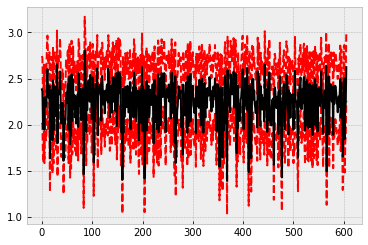

In [60]:
from pygam import LinearGAM, s, f


n_splines = [4, 14, 4, 6, 12, 12] 
gam = LinearGAM(n_splines=n_splines).fit(X_train,y_train)


y_pred = gam.predict(X_test)
predi = gam.prediction_intervals(X_test,width=0.95)

plt.plot(predi,c='r',ls='--')
plt.plot(y_pred,c='k')


GammaGAM                                                                                                  
=============================================== ==========================================================
Distribution:                         GammaDist Effective DoF:                                     70.4794
Link Function:                          LogLink Log Likelihood:                                   704.9402
Number of Samples:                         2421 AIC:                                            -1266.9216
                                                AICc:                                           -1262.5096
                                                GCV:                                                0.0073
                                                Scale:                                               0.007
                                                Pseudo R-Squared:                                   0.6565
Feature Function                  Lam

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  if __name__ == '__main__':


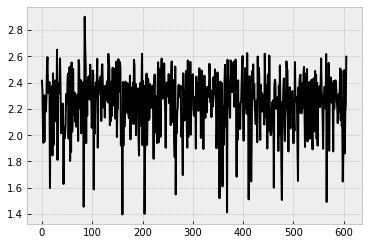

In [230]:
from pygam import GammaGAM
gam = GammaGAM().fit(X_train, y_train)
y_pred = gam.predict(X_test)
#predi = gam.prediction_intervals(X_test,width=0.95)

#plt.plot(predi,c='r',ls='--')
plt.plot(y_pred,c='k')

gam.summary()

In [231]:

import math
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# calculate the mean squared error
model_mse = mean_squared_error(y_test, y_pred)

# calculate the mean absolute error
model_mae = mean_absolute_error(y_test, y_pred)

# calulcate the root mean squared error
model_rmse =  math.sqrt(mean_squared_error(y_test, y_pred))

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 0.0312
MAE 0.138
RMSE 0.177


In [100]:
test_data_after

,Sex,Diameter,Height,Shucked weight,Viscera weight,Shell weight
0,0,0.445,0.175,0.5510,0.2440,0.2785
1,1,0.270,0.090,0.0970,0.0405,0.0650
2,1,0.320,0.100,0.1490,0.0535,0.0900
3,0,0.450,0.170,0.3325,0.1635,0.2700
4,0,0.460,0.160,0.5380,0.2210,0.2490
...,...,...,...,...,...,...
1039,1,0.190,0.080,0.0265,0.0195,0.0300
1040,1,0.395,0.115,0.3155,0.1245,0.1860
1041,1,0.355,0.110,0.2010,0.0890,0.1400
1042,2,0.520,0.175,0.6060,0.3200,0.3950


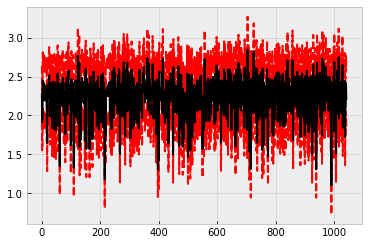

In [226]:
y_pred1 = gam.predict(test_data_after)
predi = gam.prediction_intervals(test_data_after,width=0.95)

plt.plot(predi,c='r',ls='--')
plt.plot(y_pred1,c='k')


In [61]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     31.3747
Link Function:                     IdentityLink Log Likelihood:                                -29478.7904
Number of Samples:                         2421 AIC:                                            59022.3303
                                                AICc:                                           59023.2354
                                                GCV:                                                0.0345
                                                Scale:                                              0.0337
                                                Pseudo R-Squared:                                   0.6336
Feature Function                  Lam

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [232]:
y_pred1 = gam.predict(test_data_after)
prediction = np.round(np.exp((y_pred1)),decimals = 0)
res = pd.DataFrame(prediction) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data_after.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP_GAM.csv")      # the csv file will be saved locally on the same location where this notebook is located.
#predi = gam.prediction_intervals(test_data_after,width=0.95)

#plt.plot(predi,c='r',ls='--')
#plt.plot(y_pred,c='k')

In [233]:
np.round(np.exp((y_pred1)),decimals = 0)

array([10.,  7.,  7., ...,  8., 11.,  9.])

In [217]:
prediction = np.round(np.exp((y_pred1)),decimals = 0)

In [218]:
res = pd.DataFrame(prediction) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data_after.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP_GAM.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [219]:
np.round(np.exp((y_pred1)),decimals = 0)

array([10.,  7.,  8., ...,  8., 12.,  9.])

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
X, y = make_regression(n_features=6, n_informative=2,
                   random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)


C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(max_depth=2, random_state=0)

In [114]:
predictions = regr.predict(X_test)
errors = abs(predictions - y_test.Rings.values)
# Display the performance metrics
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = np.mean(100 * (errors / y_test.Rings.values))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 0.16 degrees.
Accuracy: 92.74 %.


In [124]:
predictions = regr.predict(test_data_after)


In [129]:
predictions=np.exp(predictions)

In [126]:
predictions

array([2.39474885, 1.99702037, 1.99702037, ..., 2.17874603, 2.41533469,
       2.24191363])

In [130]:
res = pd.DataFrame(predictions) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data_after.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP_3.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [149]:
from sklearn.preprocessing import PolynomialFeatures


#X = abalone_data_after.drop('Rings', axis = 1)
#Y = abalone_data_after[['Rings']]

#X_train, X_test, y_train, y_test = train_test_split(X,np.log(Y), test_size=0.20, random_state=1)

#def create_polynomial_regression_model(degree):
 # "Creates a polynomial regression model for the given degree"
  
poly_features = PolynomialFeatures(degree=4)
  
  # transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
  
  # fit the transformed features to Linear Regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
  # evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
r2_test = r2_score(y_test, y_test_predict)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.17120775035031766
R2 score of training set is 0.6770908816517044


The model performance for the test set
-------------------------------------------
RMSE of test set is 0.1787663451861896
R2 score of test set is 0.5979240877895794


In [152]:
np.round(np.exp((y_test_predict)),decimals = 0)

array([[12.],
       [10.],
       [ 8.],
       [ 7.],
       [ 9.],
       [ 7.],
       [10.],
       [ 9.],
       [ 9.],
       [ 9.],
       [12.],
       [14.],
       [10.],
       [11.],
       [11.],
       [10.],
       [ 5.],
       [10.],
       [11.],
       [11.],
       [ 7.],
       [ 6.],
       [13.],
       [ 7.],
       [ 9.],
       [12.],
       [10.],
       [11.],
       [10.],
       [ 9.],
       [13.],
       [ 6.],
       [13.],
       [11.],
       [ 9.],
       [10.],
       [13.],
       [11.],
       [ 7.],
       [ 8.],
       [ 8.],
       [ 9.],
       [ 9.],
       [ 5.],
       [ 8.],
       [ 7.],
       [ 7.],
       [ 8.],
       [12.],
       [ 9.],
       [ 9.],
       [11.],
       [11.],
       [ 7.],
       [11.],
       [13.],
       [ 6.],
       [ 7.],
       [ 6.],
       [ 9.],
       [ 8.],
       [ 8.],
       [12.],
       [ 9.],
       [ 9.],
       [10.],
       [ 8.],
       [10.],
       [ 8.],
       [10.],
       [ 8.],
      

In [155]:
y_test_predict = poly_model.predict(poly_features.fit_transform(test_data_after))
predictions_polynomial = np.round(np.exp((y_test_predict)),decimals = 0)

In [156]:
res = pd.DataFrame(predictions_polynomial) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data_after.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
res.to_csv("prediction_results_HP_Poly.csv")      # the csv file will be saved locally on the same location where this notebook is located.

In [52]:
abalone_data_after.columns

abalone_data_after_col =abalone_data_after

abalone_data_after_col
abalone_data_after_col.rename(columns={'Shucked weight': 'Shucked', 'Viscera weight': 'Viscera', 'Shell weight': 'Shell'}, errors="raise")


,Sex,Diameter,Height,Shucked,Viscera,Shell,Rings
0,0,0.400,0.135,0.3180,0.1380,0.2080,10
1,0,0.325,0.125,0.1785,0.1125,0.1400,9
3,0,0.580,0.200,0.5850,0.4530,0.6000,19
4,2,0.470,0.160,0.4975,0.2405,0.3450,12
5,1,0.430,0.125,0.3395,0.1355,0.2095,8
...,...,...,...,...,...,...,...
3127,2,0.315,0.120,0.1990,0.0870,0.0970,8
3128,1,0.240,0.070,0.0565,0.0305,0.0540,8
3129,2,0.455,0.155,0.4210,0.1830,0.2600,11
3130,2,0.485,0.145,0.7830,0.2255,0.2865,9


In [1]:
pip install patsy

(log(Rings) ~  Diameter + Height + Shucked weight  + C(Viscera_weight,Poly) + C(Shucked_weight,Poly) + C(Shell_weight,Poly) + Sex, data=abalone_train)

Note: you may need to restart the kernel to use updated packages.


In [16]:
from patsy import ModelDesc ,Poly

In [3]:
from statsmodels.formula.api import ols 

In [62]:
mod = ols(formula='np.log(Rings) ~  Diameter + Height + Sex ', data=abalone_data_after_col)
res = mod.fit()
print(res.summary())

mod.predict(y_pred)

                            OLS Regression Results                            
Dep. Variable:          np.log(Rings)   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     875.9
Date:                Mon, 24 Aug 2020   Prob (F-statistic):               0.00
Time:                        17:57:34   Log-Likelihood:                 321.17
No. Observations:                3027   AIC:                            -634.3
Df Residuals:                    3023   BIC:                            -610.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4207      0.018     79.353      0.0

ValueError: shapes (3027,4) and (606,) not aligned: 4 (dim 1) != 606 (dim 0)